# Notebook for thesis specific diagrams etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
%matplotlib inline

mystyle = r'https://gist.githubusercontent.com/mbolt01/3087dffd11e70eccb08fdcf327374a5c/raw/std_fig'
plt.style.use(mystyle)

## Plot of TCP/NTCP and Therapeutic ratio

C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\mb22\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: divide by zero encountered in double_scalars


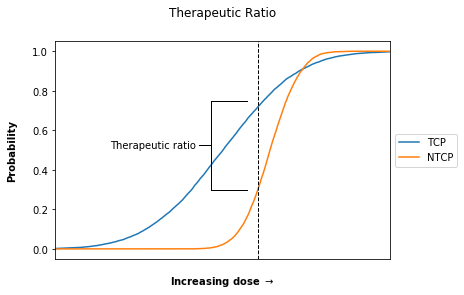

In [2]:
## functions used

def ratio_convert(num):
    """Converts inf and nan values to zero which appear when calcualting the therapeutic ratio"""
    if np.isnan(num) == True:
        ret_num = 0
    elif np.isinf(num) == True:
        ret_num = 0
    else:
        ret_num = num
    return ret_num

def cumul_create(mean,sd,num_pts,points=1000,use_range=(0,20)):
    """Create a cumulative sigmoid set of data to model a TCP/NTCP curve."""
    dist,dose = np.histogram(np.random.normal(loc=mean, scale=sd, size=num_pts),bins=points,range=use_range,density=True)
    
    dist_norm = [i/max(np.cumsum(dist)) for i in np.cumsum(dist)]
    
    return {'dose':dose[:-1],'dist':dist, 'dist_norm':dist_norm} ## dose is the dose level, dist is raw TCP, dist_norm is cumul TCP

def tcp_ntcp_stats(dose,tcp,ntcp,plot=False,combinedplot = False):
    """Calcualte ratios between TCP/NTCP, P+, do a plot and additional stats from provided TCP/NTCP
    Note: Runtime warnings are given when NaN or INF values arise during calcualtions of the ratio.
    These are changed to zeros for plotting purposes"""
    ## create the P+ = TCP(1-NTCP)
    pcure = [(tcp[i]*(1-ntcp[i])) for i in range(len(tcp))]

    ## create therapeutic ratio = TCP/NTCP
    ratio = [(tcp[i]/ntcp[i]) for i in range(len(tcp))]
    ## this doesnt seem very useful - or only around a small region which causes issues with normalisation

    ratio = [ratio_convert(ratio[i]) for i in range(len(ratio))]
    ratio_norm = [(ratio[i]/max(ratio)) for i in range(len(ratio))]

    ## create dif = TCP-NTCP
    dif = [(tcp[i]-ntcp[i]) for i in range(len(tcp))]
    
    ## get some useful stats
    
    ## dose at which stats are maximused is maximised
    pcure_max_dose = dose[np.argmax(pcure)]
    ratio_norm_max_dose = dose[np.argmax(ratio_norm)]
    dif_max_dose = dose[np.argmax(dif)]

    ## plot the results
    if plot==True:
        plt.plot(dose,tcp,c='green',lw=2,alpha=0.8,label='TCP')
        plt.plot(dose,ntcp,c='red',lw=2,alpha=0.8,label='NTCP')
        plt.plot(dose,pcure,c='grey',lw=1,alpha=0.8,label='P+')
        plt.plot(dose,ratio_norm,c='blue',lw=1,alpha=0.8,label='Ratio (Norm)')
        plt.plot(dose,dif,c='orange',lw=1,alpha=0.8,label='Dif')
        plt.xlim(0,20)
        plt.ylim(0,1)
        
        ## additional useful things to include on plot
        plt.axhline(1,c='black')
        plt.axhline(0,alpha=0.5,c='black')
        plt.axvline(pcure_max_dose,alpha=0.5,c='black', ls='--')
        plt.axvline(ratio_norm_max_dose,alpha=0.5,c='blue', ls='--')
        plt.axvline(dif_max_dose,alpha=0.5,c='orange', ls='--')
        
        if combinedplot == False:
            plt.legend(loc='best',fontsize=8)
            plt.show()
            
    return {'pcure':pcure,
            'ratio':ratio,
           'ratio_norm':ratio_norm,
           'dif':dif,
           'dose':dose,
           'tcp':tcp,
           'ntcp':ntcp,
           'pcure_max_dose':pcure_max_dose,
           'ratio_norm_max_dose':ratio_norm_max_dose,
           'dif_max_dose':dif_max_dose}

patients = 10000 # <10k can lead to jagged curves which might affect statistics for max etc
my_tcp = cumul_create(mean = 11, sd = 2.5, num_pts = patients)
my_ntcp = cumul_create(mean = 13, sd = 1, num_pts = patients)

data = tcp_ntcp_stats(my_tcp['dose'],my_tcp['dist_norm'],my_ntcp['dist_norm'],False)

#print('Dose of max P+: ', data['pcure_max_dose'])

## produce plot of P(cure) and P(complication)

do_this = False

if do_this == True:
    ## plotting of the data using the returned results - matches the plot from the function as expected
    plt.plot(data['dose'],data['tcp'], label='P(cure)')
    #plt.plot(data['dose'],data['ntcp'], label = 'probability of side effect')
    #plt.plot(data['dose'],data['ratio_norm'])
    plt.plot(data['dose'],data['pcure'], label = 'P+ = P(cure) x P(no complication)')
    sub_ntcp = [1-i for i in data['ntcp']]
    plt.plot(data['dose'],sub_ntcp, label='1-P(no complication)')
    #plt.plot(data['dose'],data['dif'])
    plt.xticks([])
    plt.xlim(4,18)
    plt.xlabel(r'Increasing dose $\rightarrow$')
    plt.ylabel('Probability')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Probability of uncomplicated cure')
    #plt.savefig('prob_uncomplicated_Cure.png',dpi=300,bbox_inches='tight')
    plt.show()

## plot only standard TCP and NTCP curves

do_this = True

if do_this == True:
    ## plotting of the data using the returned results - matches the plot from the function as expected
    plt.plot(data['dose'],data['tcp'], label='TCP')
    plt.plot(data['dose'],data['ntcp'], label = 'NTCP')
    #plt.plot(data['dose'],data['ratio_norm'])
    #plt.plot(data['dose'],data['pcure'], label = 'P+ = P(cure) x P(no complication)')
    sub_ntcp = [1-i for i in data['ntcp']]
    #plt.plot(data['dose'],sub_ntcp, label='1-P(no complication)')
    #plt.plot(data['dose'],data['dif'])
    plt.xticks([])
    plt.xlim(4,18)
    plt.xlabel(r'Increasing dose $\rightarrow$')
    plt.ylabel('Probability')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Therapeutic Ratio')
    
    ## add other labels etc
    plt.axvline(12.5, c='black', ls='--',lw=1)
    plt.plot([10.5,10.5],[0.3,0.75],c='black',lw=1)
    plt.plot([10.5,12],[0.3,0.3],c='black',lw=1)
    plt.plot([10.5,12],[0.75,0.75],c='black',lw=1)
    plt.plot([10,10.5],[0.525,0.525],c='black',lw=1)
    plt.text(9.9,0.525,'Therapeutic ratio',horizontalalignment='right',verticalalignment='center')
    
    #plt.savefig('TCP_NTCP_schematic-therapeutic_ratio.png',dpi=300,bbox_inches='tight')
    plt.show()

## Survival fraction for different LETs
Want to reproduce this: https://image.slidesharecdn.com/cell-survival-curve-120126084118-phpapp01/95/cell-survivalcurve-21-728.jpg?cb=1327567835

LQ model is $S = exp(-\alpha D - \beta D^2)$

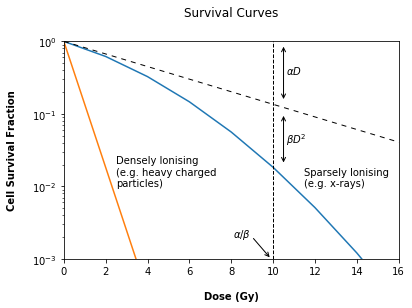

In [3]:
def s_frac(a,b,d):
    """function to calcualte survival frac from given params"""
    return np.exp(-a*d - b*(d**2))

a1b1_rat = 10
b1 = 0.02
a1 = b1*a1b1_rat ## a/b ratio used
d1 = 2

a2 = 2
b2 = 0.001
d2 = 4

a3 = a1 ## for plotting the linear only portion...?
b3 = 0
d3 = d1


n = 20 ## number of fractions
doses = [i*d1 for i in range(n)]

## create the 2 survival curves
s_n_1 = [s_frac(a1,b1,doses[i]) for i in range(n)]
s_n_2 = [s_frac(a2,b2,doses[i]) for i in range(n)]

## plot the curves
plt.semilogy(doses,s_n_1)
plt.semilogy(doses,s_n_2)

## set the limits to be usable
plt.ylim(0.001,1)
plt.xlim(0,16)

## tidy things up
plt.xlabel('Dose (Gy)')
plt.ylabel('Cell Survival Fraction')
plt.title('Survival Curves')

plt.yticks([1,0.1,0.01,0.001],['1','0.1','0,01']) ## set the ticks to be non-scientific notation

## add the annotations etc
plt.axvline(a1b1_rat,c='black',lw=1,ls='--') ## vertical line at a/b ratio
## curve for linear only part
s_n_3 = [s_frac(a3,b3,doses[i]) for i in range(n)]
plt.semilogy(doses,s_n_3,c='black',lw=1,ls='--', dashes=(5, 5))

## arrows for linear and quadratic parts
plt.annotate("",
            xy=(10.5, 0.9), xycoords='data',
            xytext=(10.5, 0.15), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(10.5, 0.1), xycoords='data',
            xytext=(10.5, 0.02), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(9.9, 0.001), xycoords='data',
            xytext=(9, 0.002), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

## text labels
plt.text(10.6,0.35,r'$\alpha D$')
plt.text(10.6,0.04,r'$\beta D^2$')
plt.text(8.1, 0.002, r'$\alpha / \beta$')

plt.text(2.5,0.01,'Densely Ionising \n(e.g. heavy charged \nparticles)')
plt.text(11.5,0.01,'Sparsely Ionising \n(e.g. x-rays)')

#plt.savefig('Survival_curve_schematic.png',dpi=300,bbox_inches='tight')

plt.show()

## Plot of survival fraction for single and multi-target models.
- Based on the diagram in the "Basic Clinical Radiobiology Book".

In [4]:
def sf_single(dose,d0=1.6):
    """Survival fraction of cells for given dose with supplied D0 for single target model"""
    return np.exp(-dose/d0)

In [5]:
def sf_multi(dose,d0=1.6,n=30):
    """Survival fraction of cells for given dose with supplied D0 and n values for multi target model"""
    return 1-(1-np.exp(-dose/d0))**n

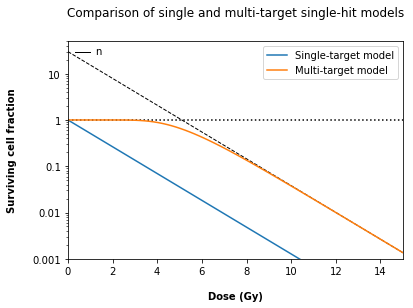

In [6]:
my_d0 = 1.5
my_n = 30

doses = np.linspace(0,20,100)

sfs_single = [sf_single(i,d0=my_d0) for i in doses]
sfs_multi = [sf_multi(i,d0=my_d0,n=my_n) for i in doses]

## plot the models
plt.semilogy(doses,sfs_single, label = 'Single-target model')
plt.semilogy(doses,sfs_multi, label = 'Multi-target model')

## plot extrapolation line
fake_d = max(doses)
fake_sf = sf_multi(fake_d,d0=my_d0)
plt.plot([0,fake_d],[my_n,fake_sf],ls='--',zorder=0,lw=1,c='black')

## horizontal line at 1
plt.axhline(1,ls=':',c='black',zorder=0)

## format y-ticks
plt.yticks([0.001,0.01,0.1,1,10],['0.001','0.01','0.1','1','10'])

## set axes
plt.ylim(0.001,my_n+20)
plt.xlim(0,15)

## add labels etc
plt.legend()
plt.text(1.5,30,'n',horizontalalignment='right',verticalalignment='center',fontsize=10)
plt.plot([0.3,1],[my_n,my_n],c='black',lw=1)

plt.xlabel('Dose (Gy)')
plt.ylabel('Surviving cell fraction')
plt.title('Comparison of single and multi-target single-hit models')

#plt.savefig('single-multi-target-models.png',dpi=300,bbox_inches='tight')

plt.show()

## Plot scitation frequency

In [7]:
## frequency of "audit" and "radiotherapy" on pubmed
df = pd.read_excel(r'audit_radiotherapy_citations.xlsx',skiprows=1)
df

,year,count,cumulative
0,1990,5,5
1,1991,9,14
2,1992,13,27
3,1993,9,36
4,1994,12,48
5,1995,27,75
6,1996,11,86
7,1997,18,104
8,1998,23,127
9,1999,20,147


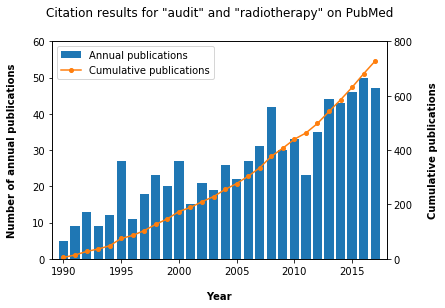

In [8]:
fig,ax1=plt.subplots()
ax1.bar(df['year'],df['count'],color='C0',label='Annual publications')
ax2 = ax1.twinx()
ax2.plot(df['year'],df['cumulative'],color='C1',marker='o',ms=4,label='Cumulative publications')
ax1.set_ylabel('Number of annual publications')
ax2.set_ylabel('Cumulative publications')
plt.title('Citation results for "audit" and "radiotherapy" on PubMed')
ax1.set_ylim(0,60)
ax2.set_ylim(0,800)
ax2.set_yticks([0,200,400,600,800])
plt.xlim(1989,2018)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)
ax1.set_xlabel('Year')
#plt.savefig('pubmed-audit-radiotherapy-citations.png',dpi=300,bbox_inches='tight')
plt.show()

## Plot of randomly created doses for modelling.
To include:
- Nominal dose of 2Gy/#
- Starting offset of -1% (= 1.98Gy)
- Drift of 3%/year
- SD of 0.3%
- Include 50#'s
- Show lines as if dose was perfect and then have the normally distributed points around it.

In [78]:
## use this data which was generated from the TCP_NTCP code.

perfect_doses = np.load(r'perfect_doses.npy')[0].T ## import and transpost array so raedy to use
random_doses = np.load(r'random_doses.npy')[0].T

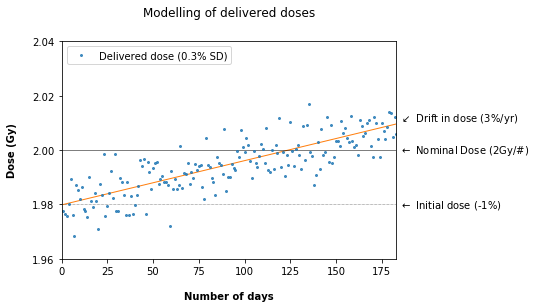

In [118]:
plt.plot(range(1,len(random_doses)+1),random_doses, 'o',ms=2,alpha=0.8, label = 'Delivered dose (0.3% SD)')
plt.plot(range(1,len(perfect_doses)+1),perfect_doses, lw=1,zorder=0)

plt.xlabel('Number of days')
plt.ylabel('Dose (Gy)')
plt.title('Modelling of delivered doses')

## set plot limits
plt.ylim(1.96,2.04)
plt.xlim(0,183)
plt.yticks([1.96,1.98,2,2.02,2.04])

## add useful lines
plt.axhline(2,ls='-',c='black',lw=0.5,zorder=0)
plt.axhline(np.min(perfect_doses), ls=':',c='black',lw=0.5,zorder=0)

## show legend
plt.legend(loc='upper left')

## add text to label lines
plt.text(185,2,'$\leftarrow$ Nominal Dose (2Gy/#)',verticalalignment='center')
plt.text(185,np.min(perfect_doses),'$\leftarrow$ Initial dose (-1%)',verticalalignment='center')
plt.text(185,perfect_doses[195],'$\swarrow$ Drift in dose (3%/yr)',verticalalignment='center')

#plt.savefig('model_of_delivered_doses.png',dpi=300,bbox_inches='tight')
plt.show()

## Plot of population and individual patient TCPs
- this wont run in ipython as need to import the module...
 - This has moved to the *Thesis_model_characterisation* notebook

In [119]:
TCP_results = TCP_NTCP.completeTCPcalc(n=100,                  # number of patients in population to model
                                       alphabeta_use=10,       # mean alpha/beta
                                       alphabeta_sd_use=20,    # SD of alpha/beta (%)
                                       d=2,                    # nominal dose (Gy/fraction)
                                       d_shift=0,              # initial dose difference (%)
                                       d_sd=0,                 # standard deviation of delivered dose (%)
                                       d_trend=0,              # dose drift (%/day)
                                       max_d=100,              # maximum dose for which TCP is calcualted (Gy)
                                       dose_of_interest=70,    # dose at which to return seperately the TCPs (Gy)
                                       n0 = 1000000,)          # N0 value supplied (if not supplied, then can be fitted)

## plot individual curves
for i in range(pop_n):
    plt.plot(TCP_results1['nom_doses'],TCP_results1['TCPs'][i],c='C1',
             alpha=0.3,lw=1, label = None)
    
## add fake line for legend with alpha = 1
plt.plot([-1,-1],[-1,-1],c='C1',
         alpha=1,lw=1, label = 'Individual TCPs')

## plot population curves
plt.plot(TCP_results1['nom_doses'],TCP_results1['TCP_pop'],ls='-',c='C0',
         label = 'Population TCP', marker='o',ms=3)
plt.xlim(20,100)
plt.ylim(0,1)
plt.legend()

plt.xlabel('Nominal Dose (Gy)')
plt.ylabel('TCP')
plt.title('Plot of individual patient TCPs which combine to give population TCP')

#plt.savefig('pop_tcp_construction.png',dpi=300,bbox_inches='tight')

plt.show()

NameError: name 'TCP_NTCP' is not defined